# Midterm project
for Zoomcamp, Ahmed Yahia Kallel

# Prepare environment 

Install the different requirements

In [730]:
# run pip to get requirement.txt
!pip install -r requirements.txt

  Using cached Flask-2.0.2-py3-none-any.whl (95 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\kay_t\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Import libraries

In [736]:
#import main libraries

#processing & viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import auc, roc_curve

# Data preparation, cleaning & visualization


Here we check the data, and prepare them for classification. A bonus point is to visualize them

## Data preparation
Import file and print head & tail

In [737]:
import os
#check if file exists, otherwise download it
if not os.path.isfile("data/healthcare-dataset-stroke-data.csv"):
    #TODO: implement the downloaders
    print("File data/healthcare-dataset-stroke-data.csv doesn't exist, aborting file")
    exit()

#load file into dataframe
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

Mapping & showing

In [738]:
# map hypertension & heartdisease
df.hypertension = df.hypertension.map({0:'No',1:'Yes'})
df.heart_disease = df.heart_disease.map({0:'No',1:'Yes'})

#change columns to lower case
df = df.rename(columns={'Residence_type':'residence_type'})

#show head & tail
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Yes,No,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data cleaning & first infos
Missing values detection & correction

In [739]:
# Checking NaNs
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing data correction

In [740]:
#Correcting the 201 missing values from BMI
df=df.fillna(0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Yes,No,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data info & visualization (General)

Here: we check the global database's information and we visualize the different data in several graphs for better understanding of the database

In [741]:
print("Database contains %d medical observations from %d unique patients" %(len(df),len(df["id"].unique())))

Database contains 5110 medical observations from 5110 unique patients


### Gender & age

In [742]:
print("The patients are %s, and are aged from %d to %d, with an average of %d" %( df["gender"].unique(), df["age"].min(), df["age"].max(), df["age"].mean()))

The patients are ['Male' 'Female' 'Other'], and are aged from 0 to 82, with an average of 43


<AxesSubplot:ylabel='gender'>

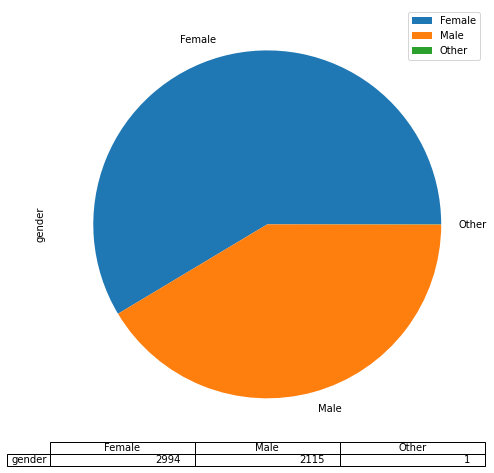

In [743]:
df.groupby(["gender"])[["gender"]].count().plot.pie(y="gender",table=True,figsize=(10,8))

<AxesSubplot:title={'center':'age'}, ylabel='Frequency'>

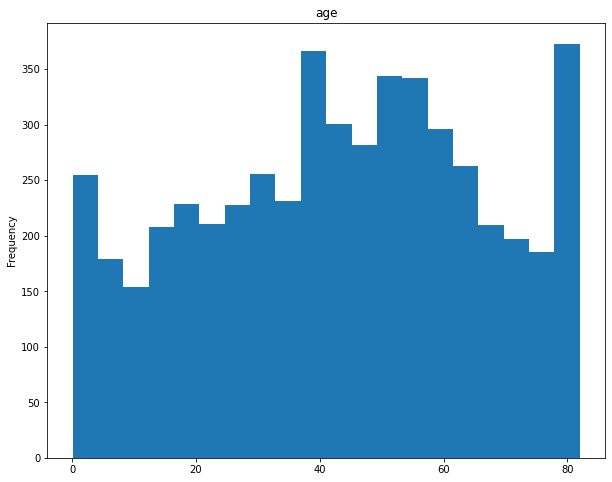

In [684]:
df["age"].plot.hist(title="age",bins=20,figsize=(10,8))

In [685]:
df["age"].describe(include='all')

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

_More insight on age_: The people are aged from **0.08 (29.2 days)** to **82** years; a median/mean around **43/45** years .  

### Marriage, Work & Residence type

<AxesSubplot:ylabel='residence_type'>

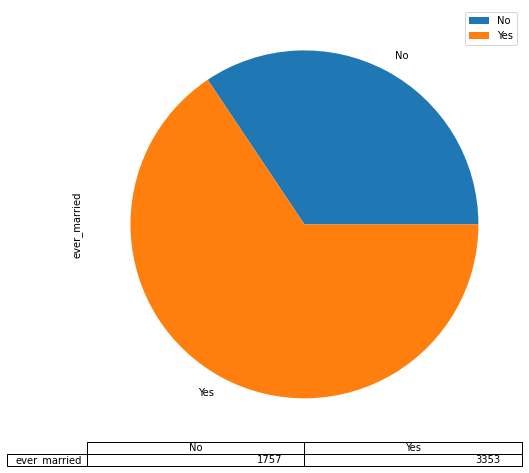

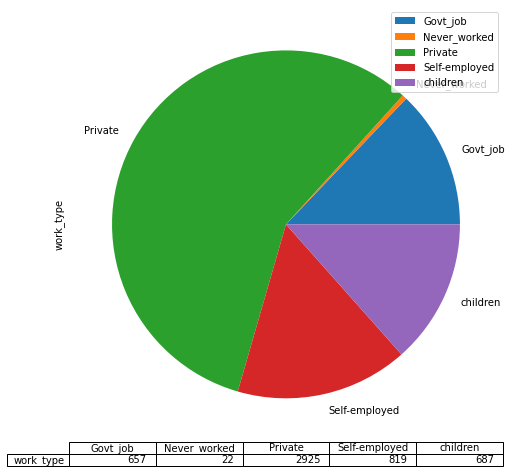

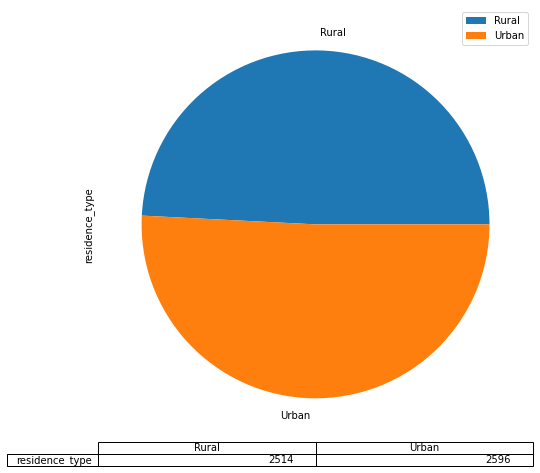

In [686]:
df.groupby(["ever_married"])[["ever_married"]].count().plot.pie(y="ever_married",table=True,figsize=(10,8))
df.groupby(["work_type"])[["work_type"]].count().plot.pie(y="work_type",table=True,figsize=(10,8))
df.groupby(["residence_type"])[["residence_type"]].count().plot.pie(y="residence_type",table=True,figsize=(10,8))


### Medical info

<AxesSubplot:ylabel='smoking_status'>

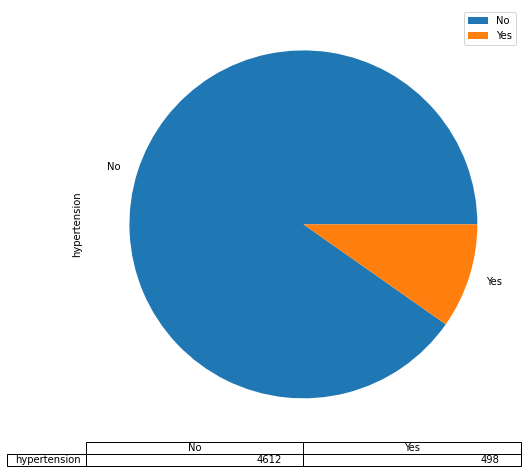

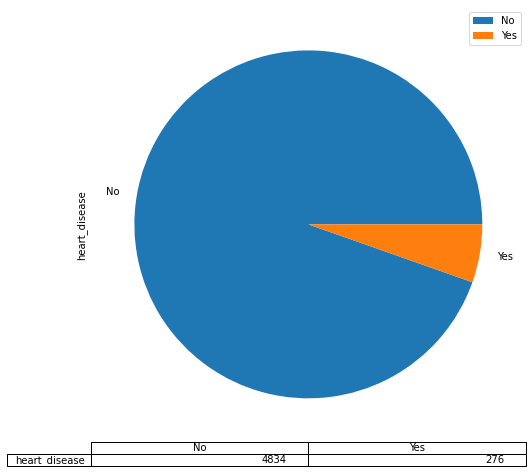

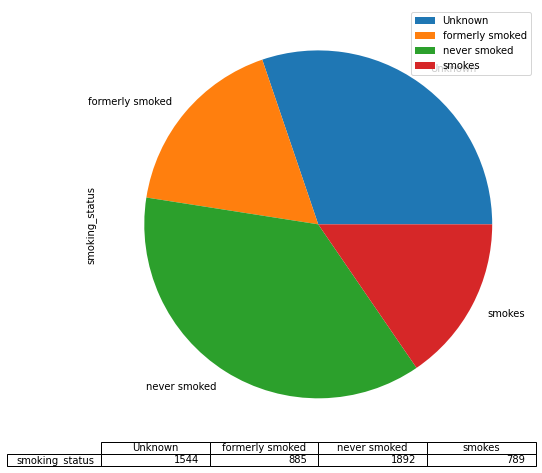

In [687]:
df.groupby(["hypertension"])[["hypertension"]].count().plot.pie(y="hypertension",table=True,figsize=(10,8))
df.groupby(["heart_disease"])[["heart_disease"]].count().plot.pie(y="heart_disease",table=True,figsize=(10,8))
df.groupby(["smoking_status"])[["smoking_status"]].count().plot.pie(y="smoking_status",table=True,figsize=(10,8))


count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

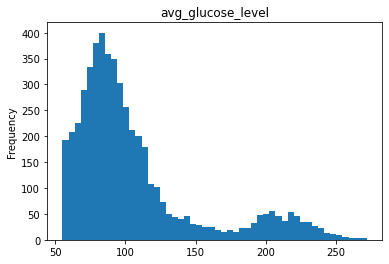

In [688]:
df["avg_glucose_level"].plot.hist(title="avg_glucose_level",bins=50)
df["avg_glucose_level"].describe()

avg_glucose_level is therefore around **106 (median: 91)**, the values range from **55.12** to **271.74**, with a standard deviation of **45.28**

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

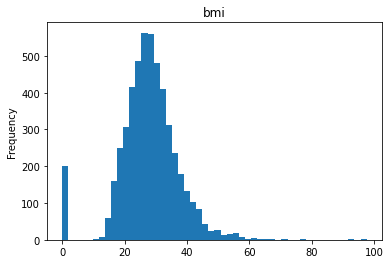

In [689]:
df["bmi"].plot.hist(title="bmi",bins=50)
df["bmi"][df["bmi"]!=0].describe()

**BMI**:

Aside the **201** discarded NA values, the BMI's range is from **10.3** to **97.6**, with a mean/median of around **28**. The dataset is not equilibred as there are some "extreme" values, as shown in both description (max) and histogram, therefore these extreme cases need to be taken into consideration during classification

### Target value: Stroke

<AxesSubplot:ylabel='stroke'>

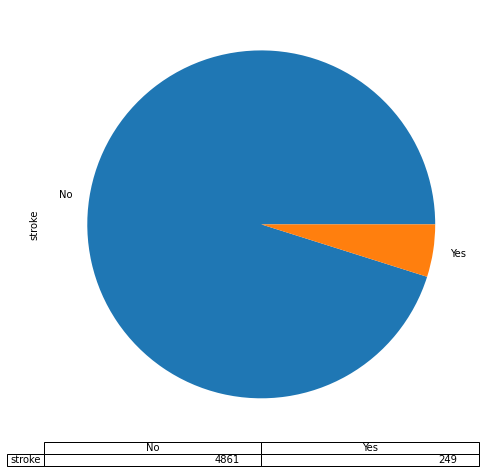

In [690]:
outp = pd.DataFrame(df.stroke.map({0:'No',1:'Yes'}))
outp.groupby("stroke")["stroke"].count().plot.pie(y="stroke",table=True,figsize=(10,8))

# Data splitting (training/validation/test)

Goal: check the database, then make sure that we don't exclude the exceptions

split the data into training/val/test: 60/20/20

In [744]:
#split according to random state = 1
df_trainval, df_test = train_test_split(df, test_size=0.2, random_state=1) #split train+val [80%], test [20%]
df_train, df_val = train_test_split(df_trainval, test_size=0.25, random_state=1) #split train[60%] val [20%]

#reset, drop index
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_test = df_test["stroke"].values
y_train = df_train["stroke"].values
y_val = df_val["stroke"].values

del df_test["stroke"]
del df_train["stroke"]
del df_val["stroke"]

del df_test["id"]
del df_train["id"]
del df_val["id"]

## Check splitting

In [692]:
print("After splitting")
dfdesc = pd.DataFrame({ 'Name':["Training","Validation","Test"], 'Count': [len(df_train), len(df_val), len(df_test)]})
dfdesc["Percentage"] = dfdesc["Count"] *100 / len(df)
dfdesc["Stroke"] = [sum(y_train),sum(y_val),sum(y_test)]
dfdesc

After splitting


,Name,Count,Percentage,Stroke
0,Training,3066,60.0,149
1,Validation,1022,20.0,40
2,Test,1022,20.0,60


## Checking training data against full database

In [693]:
df_train[df_train["bmi"]!=0].describe()

,age,avg_glucose_level,bmi
count,2949.000000,2949.000000,2949.000000
mean,42.854296,105.171085,28.957308
std,22.554181,45.246772,7.806892
min,0.080000,55.120000,10.300000
25%,25.000000,76.260000,23.700000
50%,45.000000,90.730000,28.100000
75%,60.000000,113.400000,33.100000
max,82.000000,271.740000,97.600000


No extreme data should be discarded during the subsampling for age, avg_glucose_level and bmi

In [694]:
df_train[["ever_married","work_type","residence_type","hypertension","heart_disease","smoking_status"]].describe()


,ever_married,work_type,residence_type,hypertension,heart_disease,smoking_status
count,3066,3066,3066,3066,3066,3066
unique,2,5,2,2,2,4
top,Yes,Private,Urban,No,No,never smoked
freq,2020,1743,1551,2760,2896,1138


the same goes for the ever_married, work_type, residence_type, hypertension, heart_diease and smoking_status

# Feature categorization

In [695]:
features_cat = ['gender','hypertension','heart_disease', 'ever_married', 'work_type','residence_type','smoking_status']
features_cat_bool = ['gender','hypertension','heart_disease', 'ever_married', 'residence_type']
features_cat_nbool = ['work_type','smoking_status']
features_num = ['age','avg_glucose_level','bmi']

print("Total Number of features are %d, %d are categorical and %d are numerical" %(len(df_train.columns),len(features_cat), len(features_num)))

Total Number of features are 10, 7 are categorical and 3 are numerical


# Features Analysis & Feature importance 

First part: feature analysis (to check against any possible correlation), second part: importance of each feature

## Features analysis

### Correlation between numerical features:

In [696]:
df_train.corr()

,age,avg_glucose_level,bmi
age,1.000000,0.241854,0.220966
avg_glucose_level,0.241854,1.000000,0.110154
bmi,0.220966,0.110154,1.000000


Therefore, all numerical features are uncorrelated and can be kept for further analysis

### Mutual Information implemented as correlation between binary features

In [697]:
#from scipy.stats import chisquare
mutual_info_mx = np.zeros((len(features_cat_bool),len(features_cat_bool)))
i = -1; j = -1;
for cati in features_cat_bool:
    i +=1
    j=-1;
    for catj in features_cat_bool:
        j+=1
        if(j>i) : break; #alternatively it's possible to remove this speed up and comment the 2nd line after the next
        #mutual_info_mx[i,j] = mutual_info_score(df_train[cati],df_train[catj]) #works but not so powerful...
        mutual_info_mx[i,j] = np.mean(pd.factorize(df_train[cati])[0]==pd.factorize(df_train[catj])[0])
        mutual_info_mx[j,i] = mutual_info_mx[i,j] 
pd.DataFrame(mutual_info_mx,columns=features_cat_bool,index=features_cat_bool)

,gender,hypertension,heart_disease,ever_married,residence_type
gender,1.000000,0.415851,0.396934,0.456295,0.502935
hypertension,0.415851,1.000000,0.873451,0.577952,0.490868
heart_disease,0.396934,0.873451,1.000000,0.615786,0.494781
ever_married,0.456295,0.577952,0.615786,1.000000,0.498695
residence_type,0.502935,0.490868,0.494781,0.498695,1.000000


_Aside the possible jokes about getting married and its minor (very minor) influence on the heart disease and hypertension ...._

 it's shown that **heart disease** and **hypertension** are a bit correlated (87%), other variables are uncorrelated and are more like randomly correlated (around 50%)

### Mutual information for non-boolean features

In [698]:
def analyze_non_bin_mi(feat_name):
    feat_vals = df_train[feat_name].unique()
   

    w = list()
    i=-1;
    for feat_val_name in feat_vals:
        i += 1;
        v = list()
        for cati in features_cat_bool:
             v.append(np.mean(np.array((df_train[feat_name]==feat_val_name)).astype(int)==pd.factorize(df_train[catj])[0]))
             #v.append(np.mean(pd.factorize(df_train[feat_name])[0][i]==pd.factorize(df_train[catj])[0]))
             
        w.append(v)
        #print(feat_val_name)
        #print(v)
        #df_mi[feat_val_name] = v
             # print(x)
    return pd.DataFrame(w,index=feat_vals,columns=features_cat_bool)
    return df_mi

#### Work Type

In [699]:
analyze_non_bin_mi("work_type")

,gender,hypertension,heart_disease,ever_married,residence_type
Private,0.493803,0.493803,0.493803,0.493803,0.493803
Self-employed,0.498369,0.498369,0.498369,0.498369,0.498369
Govt_job,0.500000,0.500000,0.500000,0.500000,0.500000
children,0.493477,0.493477,0.493477,0.493477,0.493477
Never_worked,0.496738,0.496738,0.496738,0.496738,0.496738


No correlation between different work types and other binary features

#### Smoking status

In [700]:
analyze_non_bin_mi("smoking_status")

,gender,hypertension,heart_disease,ever_married,residence_type
Unknown,0.502283,0.502283,0.502283,0.502283,0.502283
smokes,0.501957,0.501957,0.501957,0.501957,0.501957
never smoked,0.483040,0.483040,0.483040,0.483040,0.483040
formerly smoked,0.500978,0.500978,0.500978,0.500978,0.500978


No correlation can be seen here

## Feature importance

### Numerical data
Numerical data feature importance are typically checked using AUC

age                 0.828
avg_glucose_level   0.602
bmi                 0.515


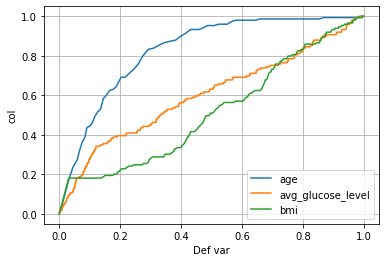

In [701]:
#num_columns
for col in features_num:
    fpr, tpr, thresholds = roc_curve(y_train, df_train[col] )
    score = auc(fpr,tpr)
    
    if score < 0.5: 
        fpr, tpr, thresholds = roc_curve(y_train, -df_train[col] )
        score = auc(fpr,tpr)

    plt.plot(fpr,tpr , label=col )
    print(col + (" "*(20-len(col))) + str(score)[:5]) #a little bit old-school python printing... 
    
plt.xlabel('Def var')
plt.ylabel('col')
plt.grid(True)
plt.legend()

Here it means that bmi and avg_gluose_level are not so important as aging in determining the stroke. It also means that the stroke probability increases with age...

### Categorical data

,Stroke
gender,0.000059
hypertension,0.003983
heart_disease,0.007715
ever_married,0.005643
work_type,0.005898
residence_type,0.000061
smoking_status,0.002115


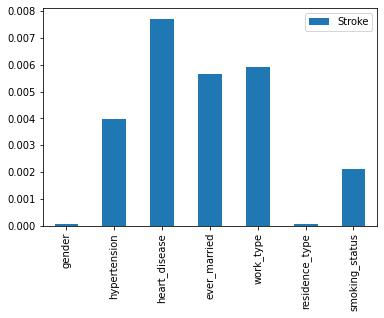

In [702]:
v= list()
for cati in features_cat:
   v.append(mutual_info_score(df_train[cati], y_train))
cat_data_analy = pd.DataFrame(v,index= features_cat,columns = ['Stroke'])

cat_data_analy.plot.bar()
cat_data_analy


Here, because the chance of stroke is very small, the values are smaller than what is known in the course.

Nevertheless, it is shown that **heat_disease** is the most serious feature, in addition of **ever_married**, **work_type**, **hypertension** and **smoking_status**. 

# Model selection process & parameter tuning

libraries:

In [772]:
#libraries
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False) #import encoder

#auc
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


Test classifier:

In [773]:
def test_classifier(clf,predictFcn,X_train,y_train,X_val,y_val):
    clf.fit(X_train,y_train)
    y_predict = predictFcn(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, y_predict)
    #roc_data = (fpr,tpr,thresholds)
    return (np.mean(predictFcn(X_train) == y_train),np.mean(predictFcn(X_val) == y_val),roc_auc_score(y_val,y_predict),f1_score(y_val,y_predict))

Prepare data for training (one-hot encoder)

In [774]:
# Serialize non-numerical data using DictVectorizer (aka One-Hot Encoding)
train_dict = df_train.to_dict(orient='records') # get categorial variables from train db, sort them by x and put them into dictionary 
X_train = dv.fit_transform(train_dict) #one-hot encoding 
val_dict = df_val.to_dict(orient='records') #apply same 
X_val = dv.transform(val_dict)

## Decision Tree

### Decision Tree using gini

First decision tree classification, max depth = 1

In [775]:
dt = DecisionTreeClassifier(max_depth=1)
v=test_classifier(dt,dt.predict,X_train,y_train,X_val,y_val)
pd.DataFrame(v,index=['Classification Accuracy','Validation Accuracy','AUC','F1'],columns=['D.T. max_depth = 1'])


,D.T. max_depth = 1
Classification Accuracy,0.951402
Validation Accuracy,0.960861
AUC,0.500000
F1,0.000000


In [776]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- age <= 67.50
|   |--- class: 0
|--- age >  67.50
|   |--- class: 0



C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Therefore, here it classifies stroke around the age, however it can be seen that the classifier is not good enough, it basically returns 0. This is why AUC is around 0.5**

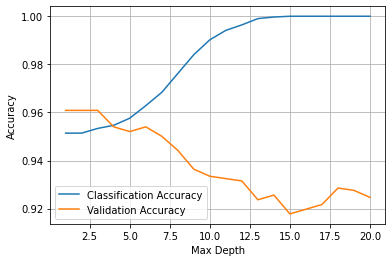

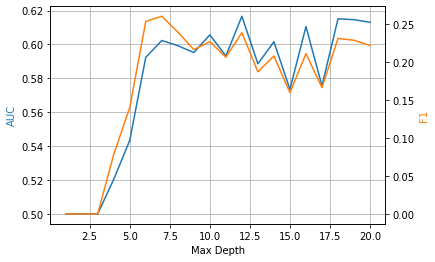

In [750]:
dtf = pd.DataFrame(index=['Classification Accuracy','Validation Accuracy','AUC','F1'])

investigated_max_depth =  range(1,21)
for maxdepth in investigated_max_depth:
    dt = DecisionTreeClassifier(max_depth=maxdepth)
    v=test_classifier(dt,dt.predict,X_train,y_train,X_val,y_val)
    
    dtf["max_depth" + str(maxdepth)] = v

plt.plot(investigated_max_depth, dtf.iloc[0,:],label='Classification Accuracy')
plt.plot(investigated_max_depth, dtf.iloc[1,:],label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


plt.plot(investigated_max_depth, dtf.iloc[2,:],label='AUC')
plt.xlabel('Max Depth')
plt.ylabel('AUC',color='tab:blue')
plt.grid(True)
ax = plt.twinx()

ax.plot(investigated_max_depth, dtf.iloc[3,:],label='F1-Score',color='tab:orange')
#plt.xlabel('Max Depth')
ax.set_ylabel('F1',color='tab:orange')
#plt.grid(True)
#plt.legend()
plt.show()

* **Starting from max_depth = 3, decision tree is capable of returning stroke=True (1). Validation Accuracy is 96.1%**
* **Compromise between AUC, F1, validation and classification: at max depth = 6**
* **AUC: 0.59, F1=0.26, validation: 95%**

### Decision Tree using Entropy

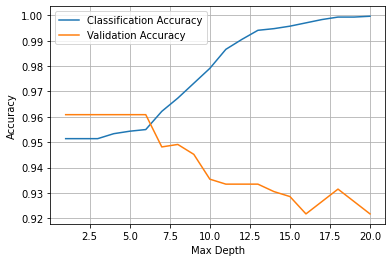

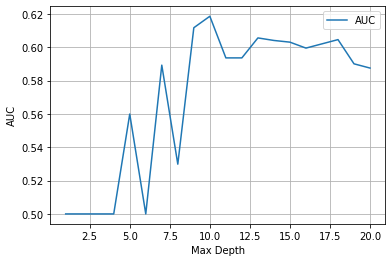

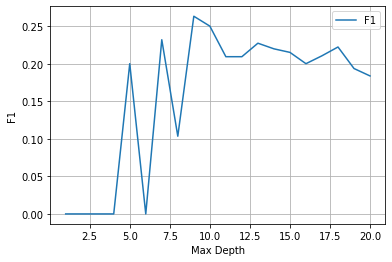

In [751]:
dtf = pd.DataFrame(index=['Classification Accuracy','Validation Accuracy','AUC','F1'])

investigated_max_depth =  range(1,21)
for maxdepth in investigated_max_depth:
    dt = DecisionTreeClassifier(max_depth=maxdepth,criterion='entropy')
    v=test_classifier(dt,dt.predict,X_train,y_train,X_val,y_val)
    dtf["max_depth" + str(maxdepth)] = v

plt.plot(investigated_max_depth, dtf.iloc[0,:],label='Classification Accuracy')
plt.plot(investigated_max_depth, dtf.iloc[1,:],label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


plt.plot(investigated_max_depth, dtf.iloc[2,:],label='AUC')
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.grid(True)
plt.legend()
plt.show()


plt.plot(investigated_max_depth, dtf.iloc[3,:],label='F1')
plt.xlabel('Max Depth')
plt.ylabel('F1')
plt.grid(True)
plt.legend()
plt.show()

* **Using Entropy gave similar perforamnce to gini**
* **But, at this case, using max_depth=9 provides the best AUC and therefore is recommended**
* **AUC: 0.61, F1=0.26, Validation: 94%**

## Random Forest

Train random forest with different n_estimator and max_depth

In [752]:
df_rf = pd.DataFrame(columns=['nestim','maxdepth','class','val','auc','f1'])
for max_dep in [1, 5, 7, 9, 10, 15, 20, 25]:
        for n_est in np.arange(1,100):
                rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, n_jobs=-1, random_state=1)
                v=test_classifier(rf,rf.predict,X_train,y_train,X_val,y_val)
                df_rf=df_rf.append(dict(zip(['nestim','maxdepth','class','val','auc','f1'], [n_est, max_dep , v[0],v[1],v[2],v[3]])),ignore_index=True)
df_rf                

,nestim,maxdepth,class,val,auc,f1
0,1.0,1.0,0.951402,0.960861,0.500000,0.000000
1,2.0,1.0,0.951402,0.960861,0.500000,0.000000
2,3.0,1.0,0.951402,0.960861,0.500000,0.000000
3,4.0,1.0,0.951402,0.960861,0.500000,0.000000
4,5.0,1.0,0.951402,0.960861,0.500000,0.000000
...,...,...,...,...,...,...
787,95.0,25.0,1.000000,0.960861,0.511991,0.047619
788,96.0,25.0,1.000000,0.960861,0.511991,0.047619
789,97.0,25.0,1.000000,0.960861,0.511991,0.047619
790,98.0,25.0,1.000000,0.960861,0.511991,0.047619


<AxesSubplot:xlabel='None-maxdepth', ylabel='nestim'>

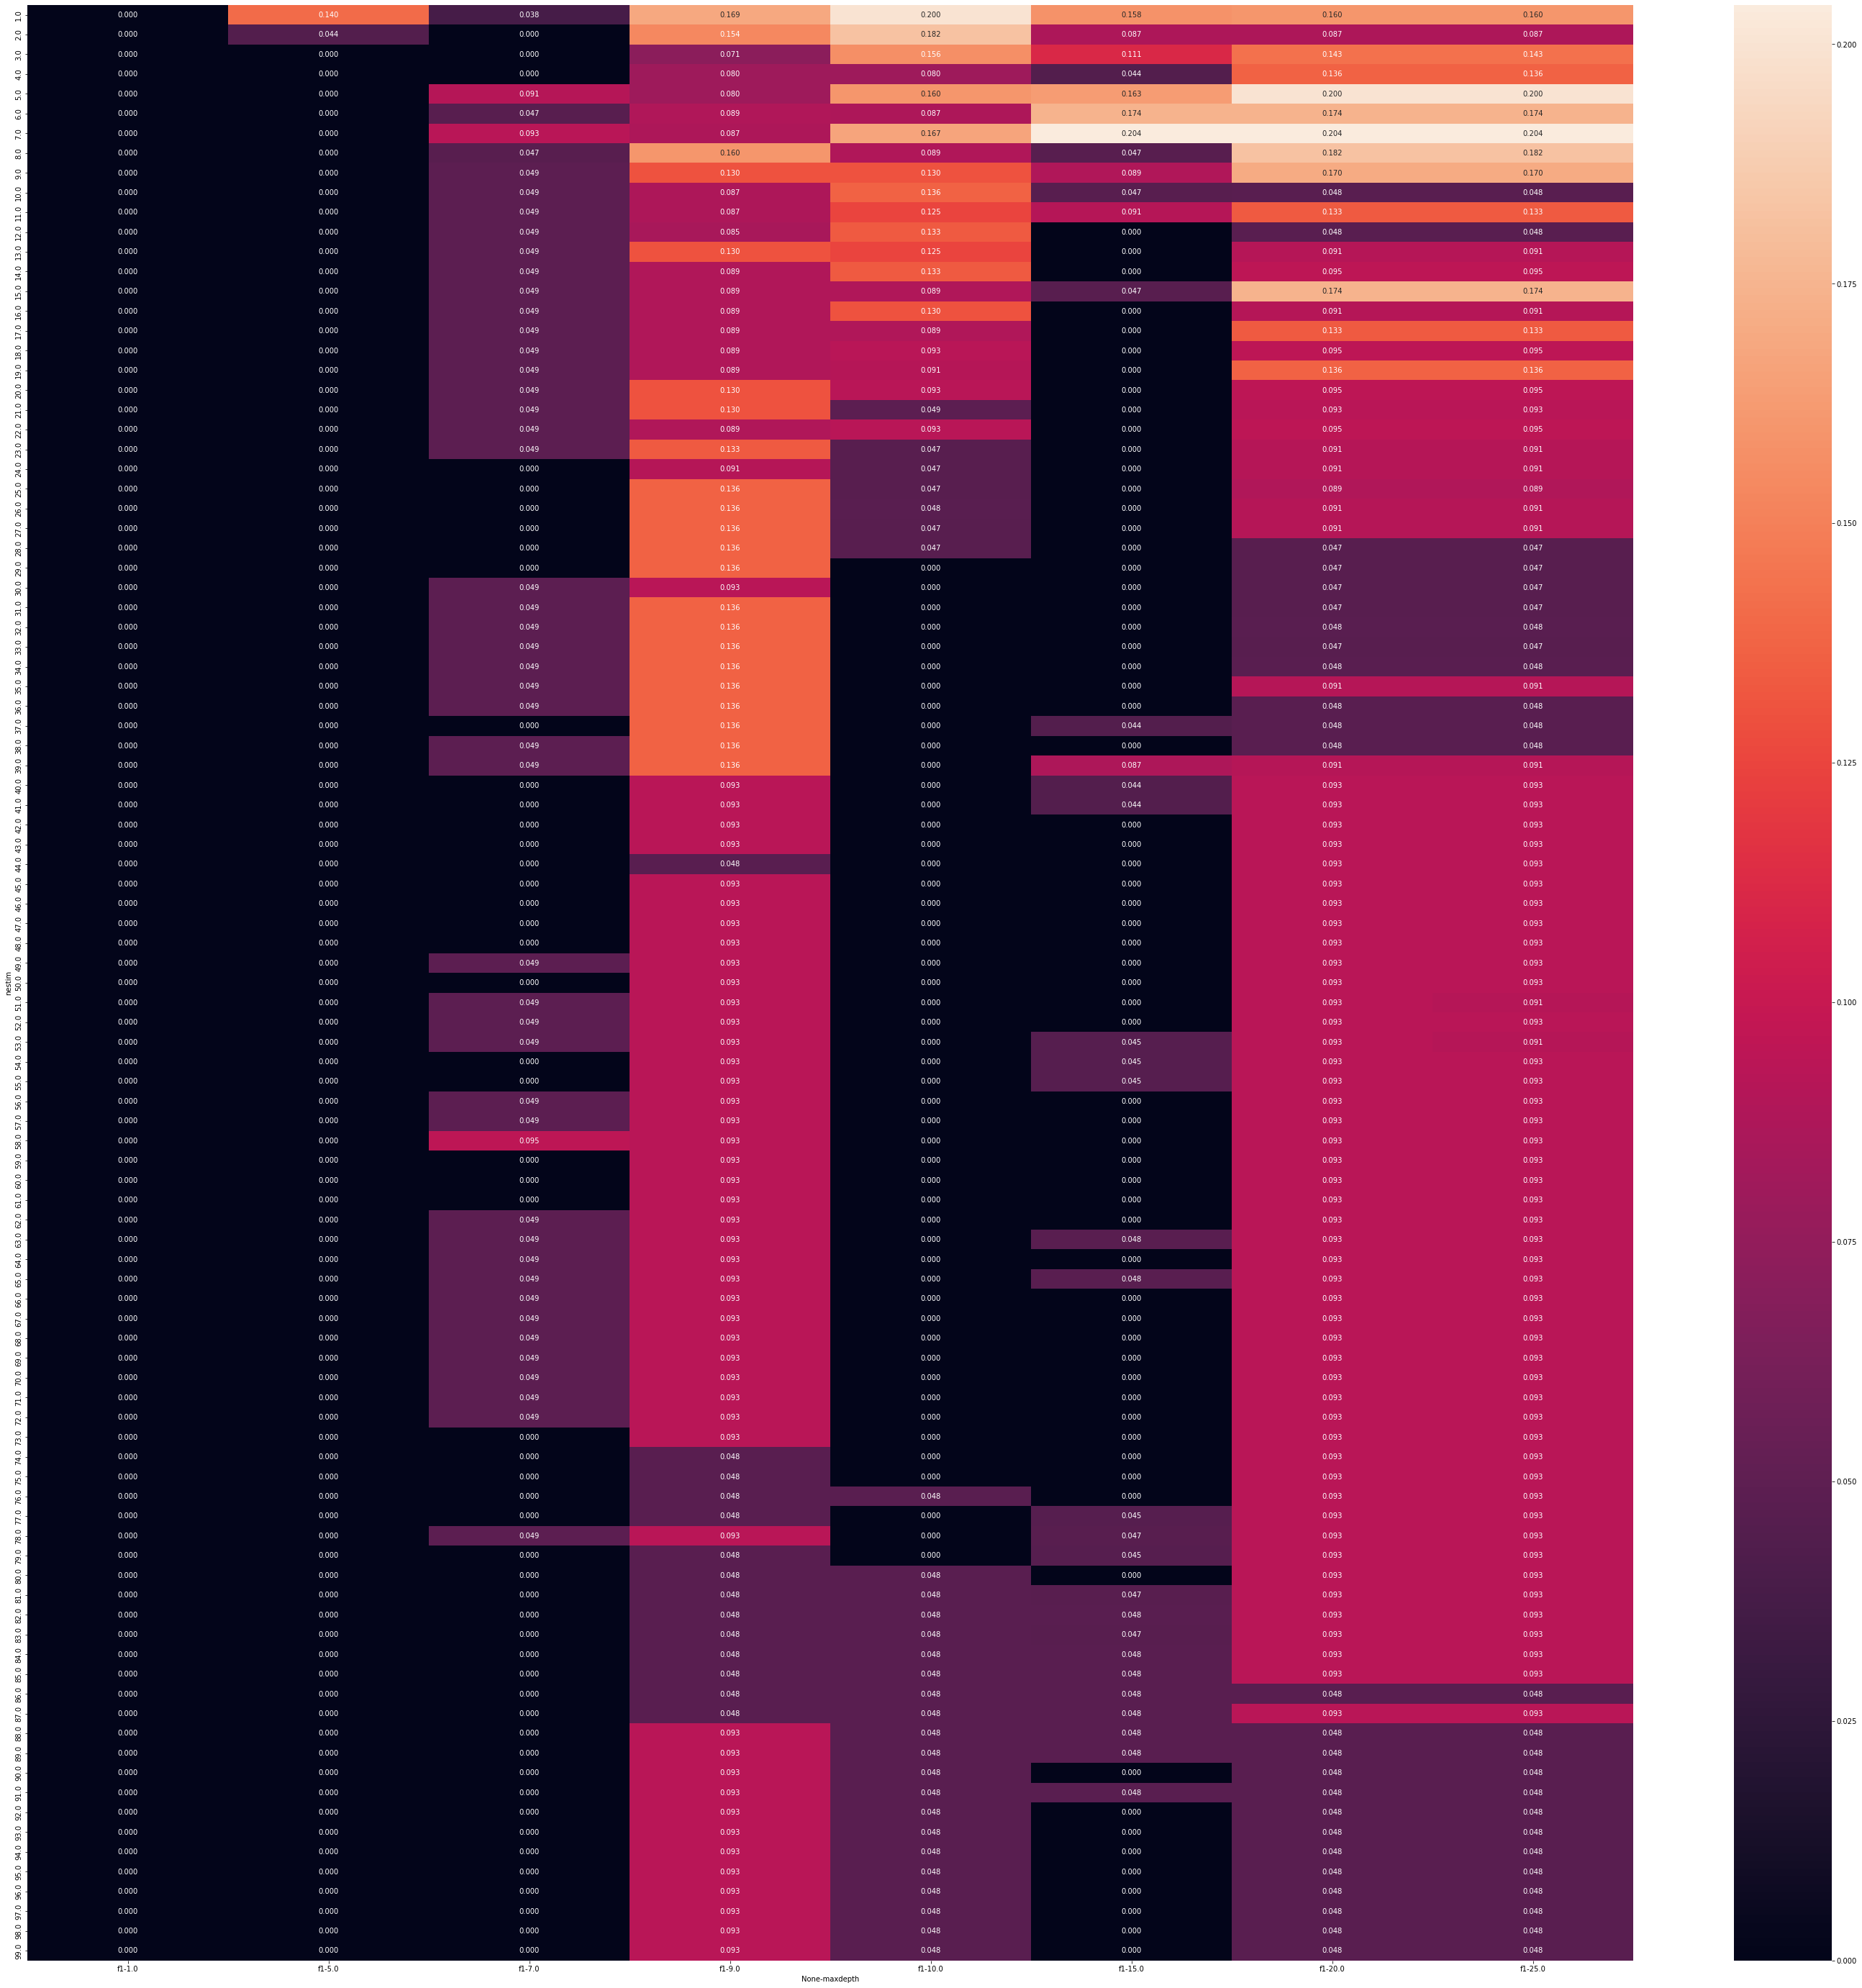

In [753]:
plt.figure(figsize=(50,50))
df_rf_pivot = df_rf.pivot(index='nestim', columns=['maxdepth'], values=['f1'])
sns.heatmap(df_rf_pivot, annot=True, fmt=".3f")

* n_estimator= 7, any max_depth above 10 does the job, F1=0.204

<AxesSubplot:xlabel='None-maxdepth', ylabel='nestim'>

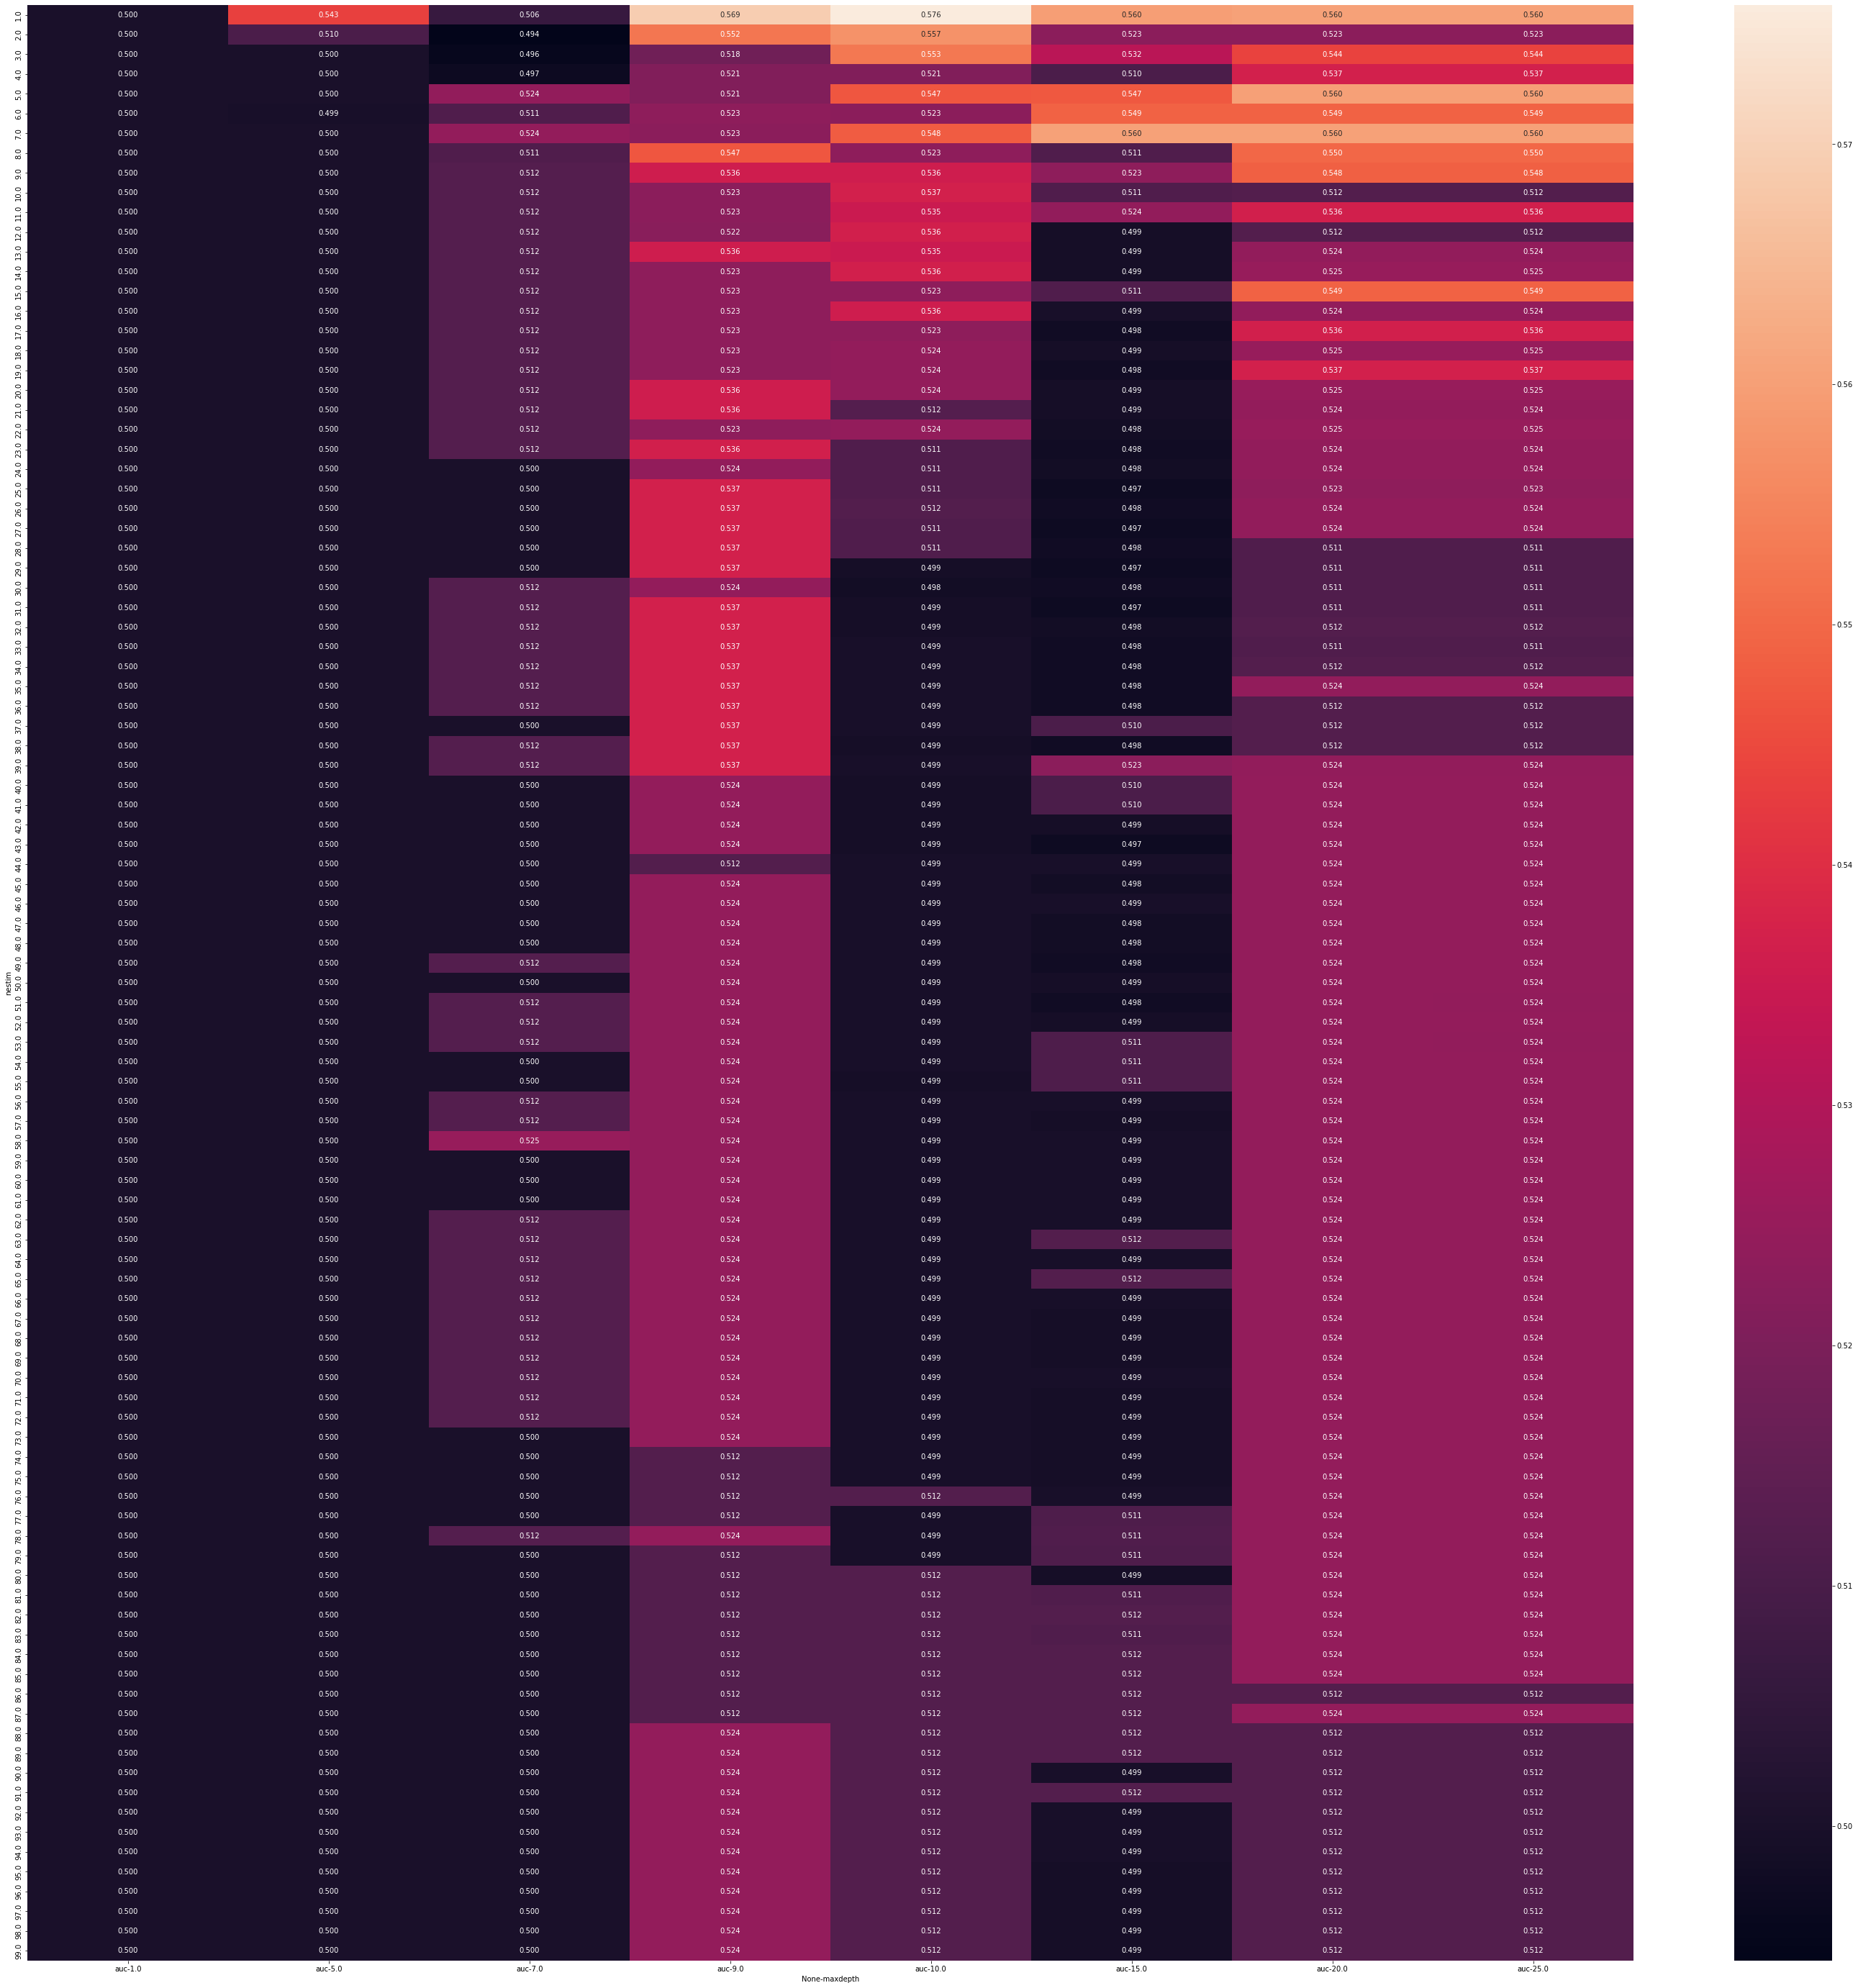

In [754]:
plt.figure(figsize=(50,50))
df_rf_pivot = df_rf.pivot(index='nestim', columns=['maxdepth'], values=['auc'])
sns.heatmap(df_rf_pivot, annot=True, fmt=".3f")

* AUC heatmap confirms this too

<AxesSubplot:xlabel='None-maxdepth', ylabel='nestim'>

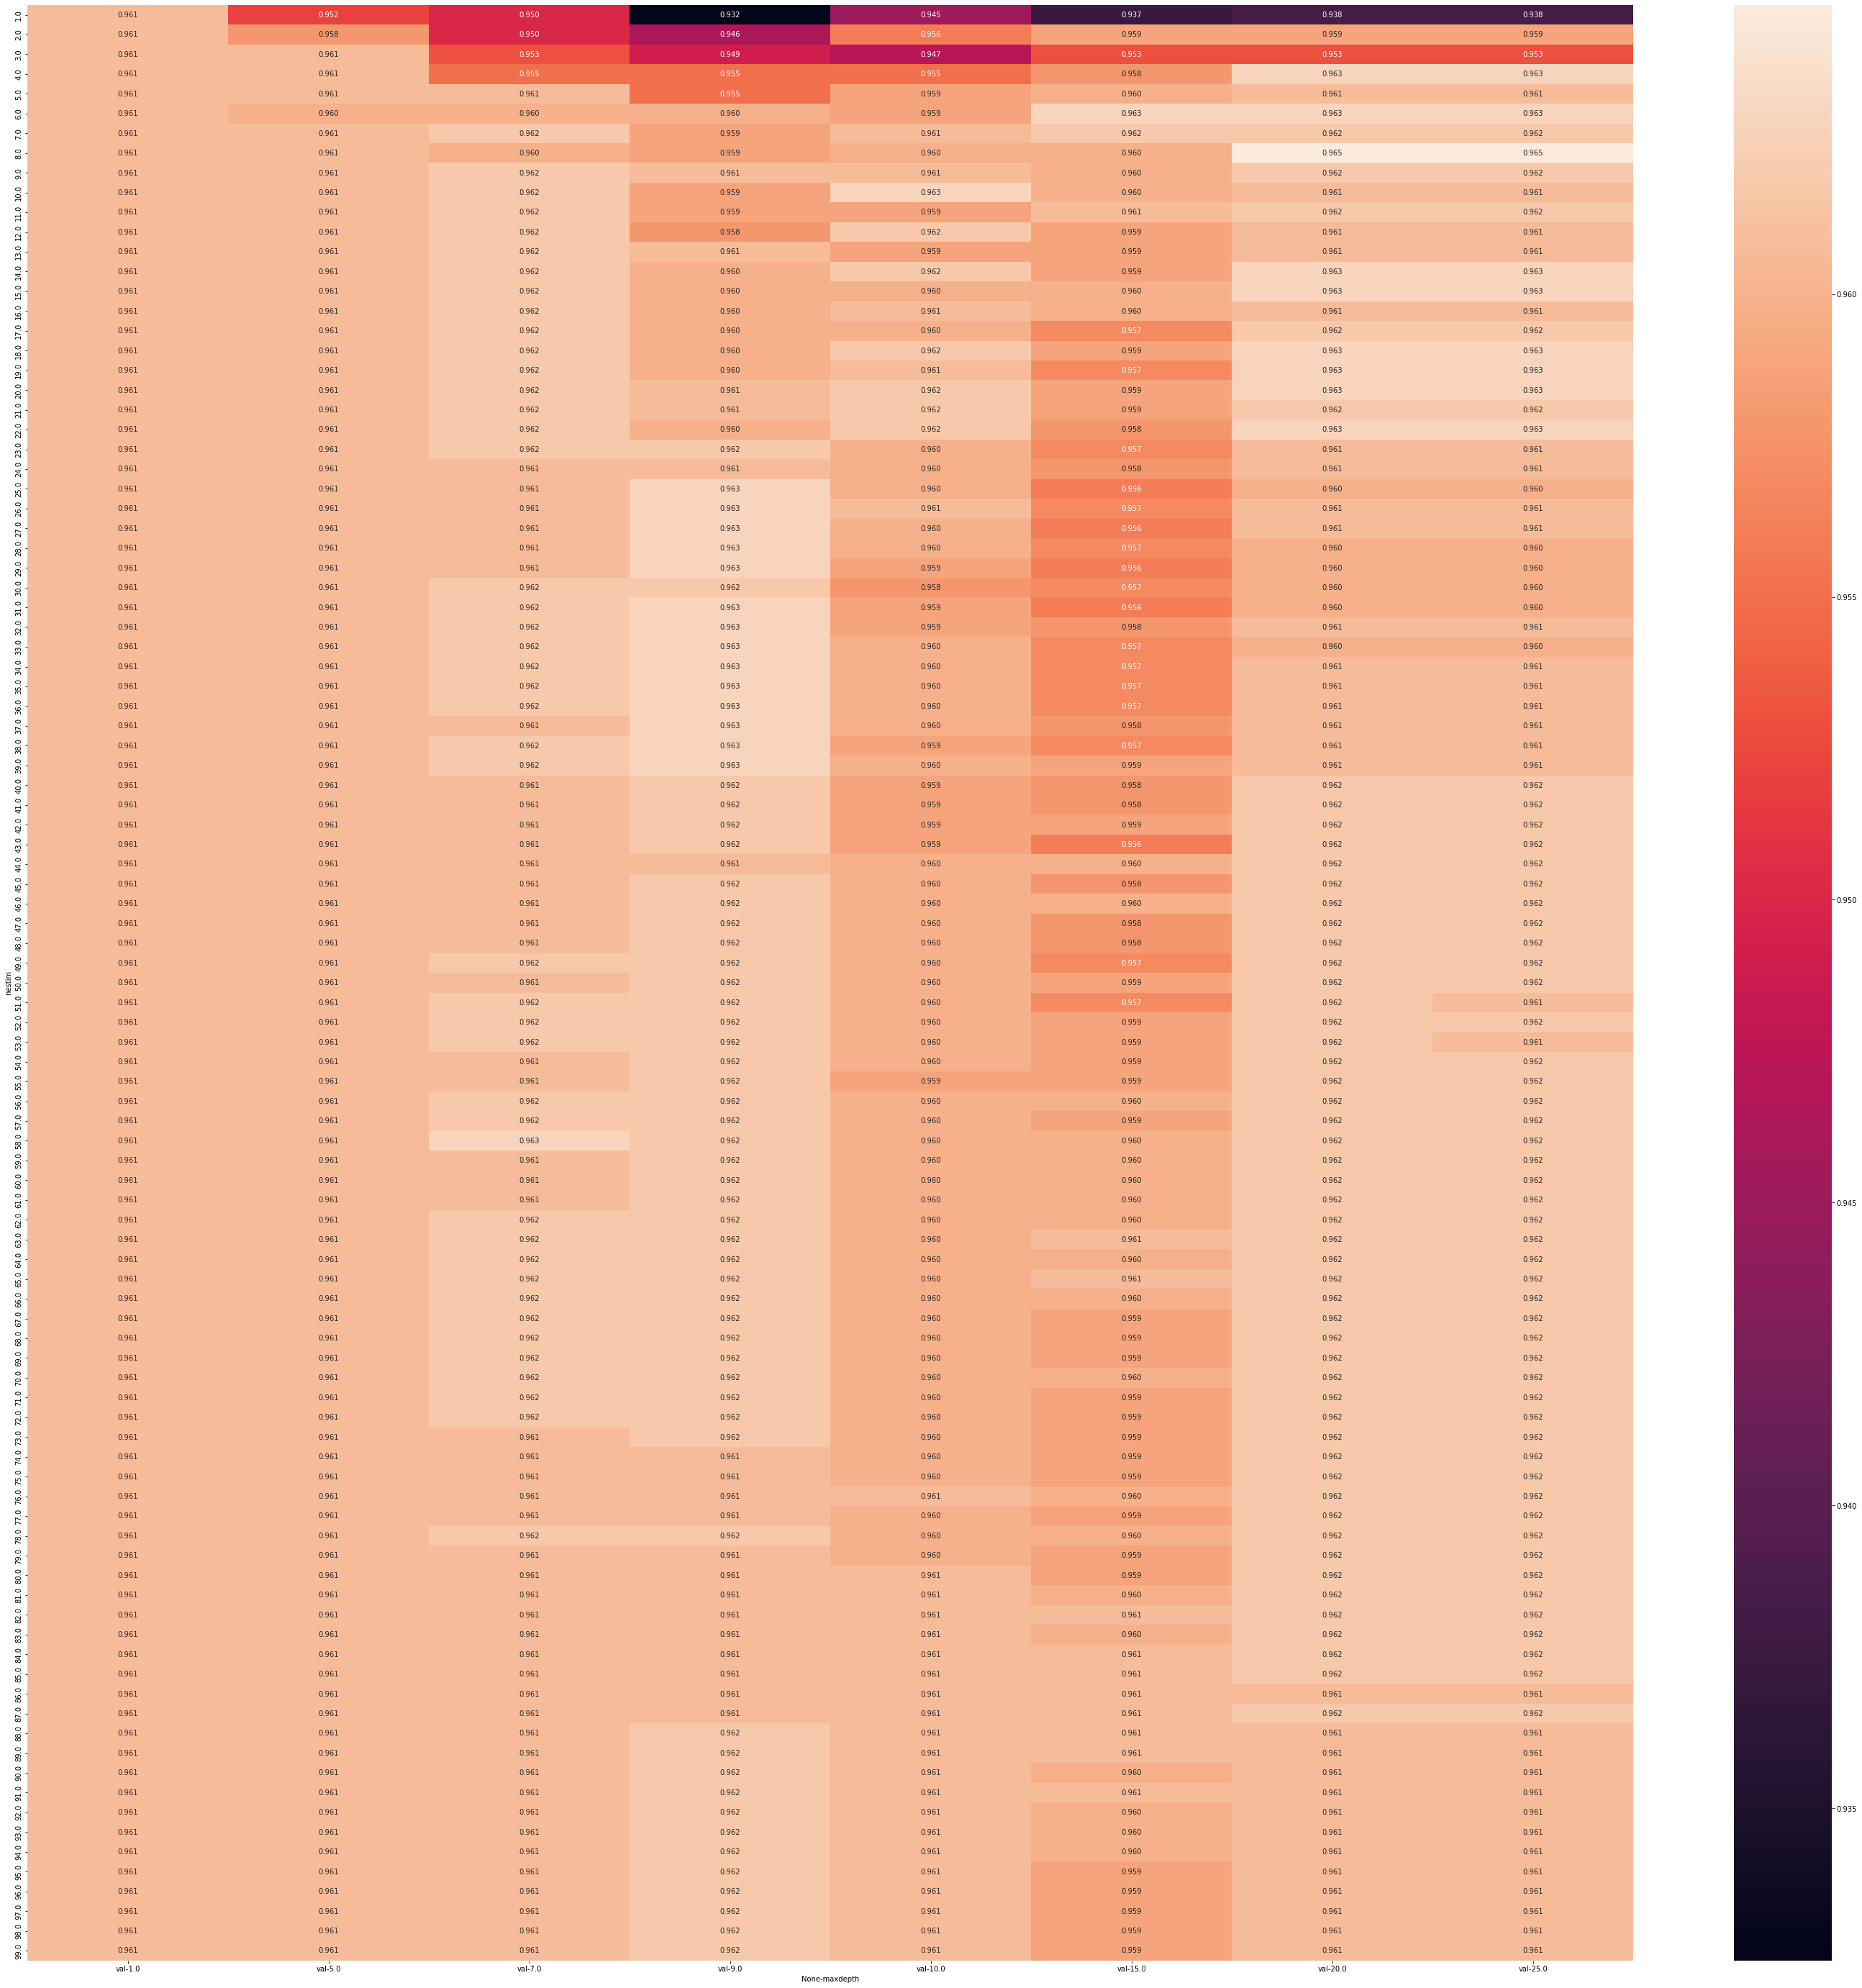

In [755]:
plt.figure(figsize=(50,50))
df_rf_pivot = df_rf.pivot(index='nestim', columns=['maxdepth'], values=['val'])
sns.heatmap(df_rf_pivot, annot=True, fmt=".3f")

In [756]:
df_rf.groupby(['nestim','maxdepth']).max().sort_values("auc",ascending=False)

class       val       auc        f1
nestim maxdepth                                        
1.0    10.0      0.965427  0.945205  0.575789  0.200000
       9.0       0.956947  0.932485  0.569170  0.168675
7.0    15.0      0.988911  0.961840  0.560463  0.204082
       20.0      0.992172  0.961840  0.560463  0.204082
       25.0      0.992172  0.961840  0.560463  0.204082
...                   ...       ...       ...       ...
25.0   15.0      0.994455  0.955969  0.497454  0.000000
43.0   15.0      0.996738  0.955969  0.497454  0.000000
4.0    7.0       0.955643  0.954990  0.496945  0.000000
3.0    7.0       0.956295  0.953033  0.495927  0.000000
2.0    7.0       0.958904  0.950098  0.494399  0.000000

[792 rows x 4 columns]

In [757]:
df_rf.groupby(['nestim','maxdepth']).max().sort_values("f1",ascending=False)

class       val       auc        f1
nestim maxdepth                                        
7.0    15.0      0.988911  0.961840  0.560463  0.204082
       20.0      0.992172  0.961840  0.560463  0.204082
       25.0      0.992172  0.961840  0.560463  0.204082
5.0    20.0      0.990541  0.960861  0.559954  0.200000
       25.0      0.990541  0.960861  0.559954  0.200000
...                   ...       ...       ...       ...
47.0   15.0      0.996738  0.957926  0.498473  0.000000
       10.0      0.973907  0.959883  0.499491  0.000000
       7.0       0.957926  0.960861  0.500000  0.000000
       5.0       0.952055  0.960861  0.500000  0.000000
50.0   10.0      0.973907  0.959883  0.499491  0.000000

[792 rows x 4 columns]

* Compromise between AUC and F1 as well as validation:
* n_estimator=7.0, max_depth=15.0
* **F1=0.20, AUC=0.56, Validation: 96.1%**


## Linear Classifier

In [758]:
def linear_class_predict(X_val):
    return linfit.predict_proba(X_val)[:, 1] > threshold_value

df_linclf = pd.DataFrame(columns=['C','maxit','th', 'class','val','auc']).reset_index(drop=True)

reg_to_be_investigated = [0.001, 0.1, 1.0, 10, 100,1000]
max_iter_to_be_investigated = [10, 100, 1000, 10000,1e5]
thresholds = np.arange(0,1,0.05)

for c in reg_to_be_investigated:
    for maxit in max_iter_to_be_investigated:
        for th in thresholds:
            threshold_value = th
            linfit = LogisticRegression(solver='liblinear', C=c, max_iter=maxit)
            v=test_classifier(linfit,linear_class_predict,X_train,y_train,X_val,y_val)
            df_linclf=df_linclf.append({'C':c,'maxit':maxit,'th':th,'class':v[0],'val':v[1],'auc':v[2]},ignore_index=True)


C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed t

In [759]:
df_linclf.reset_index(drop=True)
df_linclf.groupby("C")["auc","val"].describe()

C:\Users\kay_t\AppData\Local\Temp/ipykernel_10476/3580993323.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_linclf.groupby("C")["auc","val"].describe()


auc                                                         \
          count      mean       std       min  25%       50%       75%   
C                                                                        
0.001     100.0  0.530717  0.028761  0.500000  0.5  0.538798  0.546391   
0.100     100.0  0.542605  0.065588  0.498982  0.5  0.509700  0.555881   
1.000     100.0  0.548436  0.074078  0.498982  0.5  0.500000  0.569908   
10.000    100.0  0.549630  0.075314  0.498982  0.5  0.500000  0.569908   
100.000   100.0  0.549651  0.075364  0.498982  0.5  0.500000  0.569908   
1000.000  100.0  0.549671  0.075414  0.498982  0.5  0.500000  0.569908   

                      val                                                    \
               max  count      mean       std       min       25%       50%   
C                                                                             
0.001     0.606492  100.0  0.880479  0.213056  0.039139  0.932241  0.952055   
0.100     0.724516  100.0  0.892495  0.204447  0.039139  0.940802  0.958904   
1.000     0.738900  100.0  0.893102  0.204195  0.039139  0.938356  0.959883   
10.000    0.736864  100.0  0.893092  0.204091  0.039139  0.939090  0.959883   
100.000   0.736864  100.0  0.893131  0.204061  0.039139  0.939090  0.959883   
1000.000  0.736864  100.0  0.893170  0.204032  0.039139  0.939090  0.959883   

                              
               75%       max  
C                             
0.001     0.960861  0.960861  
0.100     0.960861  0.960861  
1.000     0.960861  0.960861  
10.000    0.960861  0.960861  
100.000   0.960861  0.960861  
1000.000  0.960861  0.960861

Best threshold values around 0-0.15

In [760]:
def linear_class_predict(X_val):
    return linfit.predict_proba(X_val)[:, 1] > threshold_value

df_linclf = pd.DataFrame(columns=['C','maxit','th', 'class','val','auc']).reset_index(drop=True)

reg_to_be_investigated = [0.001, 0.1, 1.0, 10, 100,1000]
max_iter_to_be_investigated = [10, 100, 1000, 10000,1e5]
thresholds = np.arange(0,0.2,0.01)

for c in reg_to_be_investigated:
    for maxit in max_iter_to_be_investigated:
        for th in thresholds:
            threshold_value = th
            linfit = LogisticRegression(solver='liblinear', C=c, max_iter=maxit)
            v=test_classifier(linfit,linear_class_predict,X_train,y_train,X_val,y_val)
            df_linclf=df_linclf.append({'C':c,'maxit':maxit,'th':th,'class':v[0],'val':v[1],'auc':v[2]},ignore_index=True)


C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed t

In [761]:
df_linclf.reset_index(drop=True)
df_linclf.groupby("th")["auc","val"].describe()

C:\Users\kay_t\AppData\Local\Temp/ipykernel_10476/3481619506.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_linclf.groupby("th")["auc","val"].describe()


auc                                                              \
     count      mean       std       min       25%       50%       75%   
th                                                                       
0.00  30.0  0.500000  0.000000  0.500000  0.500000  0.500000  0.500000   
0.01  30.0  0.615393  0.085841  0.494068  0.513238  0.677928  0.692821   
0.02  30.0  0.670082  0.106116  0.467948  0.604888  0.741522  0.750178   
0.03  30.0  0.670650  0.088962  0.483121  0.657968  0.713875  0.720195   
0.04  30.0  0.685720  0.082685  0.505932  0.696843  0.727851  0.727851   
0.05  30.0  0.694866  0.070617  0.541013  0.706186  0.730117  0.732536   
0.06  30.0  0.715368  0.064235  0.577902  0.717464  0.751502  0.754557   
0.07  30.0  0.709480  0.070439  0.566828  0.679786  0.754277  0.756186   
0.08  30.0  0.707734  0.056715  0.598396  0.673116  0.744043  0.744934   
0.09  30.0  0.703585  0.057560  0.598345  0.656772  0.741217  0.741726   
0.10  30.0  0.697699  0.051122  0.606492  0.666955  0.736864  0.736864   
0.11  30.0  0.679792  0.052608  0.601120  0.617693  0.718992  0.719501   
0.12  30.0  0.664933  0.046241  0.596767  0.610285  0.699593  0.699593   
0.13  30.0  0.644872  0.047709  0.564358  0.600840  0.680193  0.680575   
0.14  30.0  0.640269  0.041824  0.567923  0.604404  0.673803  0.674185   
0.15  30.0  0.641203  0.041524  0.571996  0.608987  0.666395  0.678895   
0.16  30.0  0.631334  0.044433  0.562042  0.586023  0.668941  0.668941   
0.17  30.0  0.626678  0.048173  0.551069  0.588060  0.660514  0.671487   
0.18  30.0  0.620092  0.041299  0.552597  0.590097  0.637551  0.660514   
0.19  30.0  0.615972  0.038443  0.553106  0.592133  0.640606  0.651960   

                 val                                                    \
           max count      mean       std       min       25%       50%   
th                                                                       
0.00  0.500000  30.0  0.039139  0.000000  0.039139  0.039139  0.039139   
0.01  0.693712  30.0  0.284703  0.160549  0.064579  0.096869  0.404110   
0.02  0.750178  30.0  0.446641  0.173535  0.184932  0.240705  0.572407   
0.03  0.740733  30.0  0.556034  0.134812  0.306262  0.457926  0.650685   
0.04  0.735769  30.0  0.639530  0.097367  0.442270  0.601761  0.699609   
0.05  0.733172  30.0  0.697815  0.067114  0.555773  0.688845  0.734834   
0.06  0.754557  30.0  0.752577  0.047729  0.649706  0.756605  0.775930   
0.07  0.756314  30.0  0.794260  0.023287  0.743640  0.799413  0.804305   
0.08  0.745061  30.0  0.827006  0.010477  0.804305  0.827789  0.831703   
0.09  0.753208  30.0  0.848989  0.000938  0.847358  0.848337  0.849315   
0.10  0.738900  30.0  0.865329  0.002031  0.863014  0.863014  0.865949   
0.11  0.732510  30.0  0.878539  0.004189  0.874755  0.875734  0.877691   
0.12  0.713620  30.0  0.888389  0.005041  0.883562  0.883562  0.887476   
0.13  0.691675  30.0  0.895923  0.003985  0.891389  0.892368  0.893346   
0.14  0.674313  30.0  0.905512  0.002265  0.903131  0.903376  0.904110   
0.15  0.678895  30.0  0.914220  0.001841  0.911937  0.912916  0.912916   
0.16  0.669450  30.0  0.918297  0.001640  0.916830  0.916830  0.917808   
0.17  0.671487  30.0  0.922407  0.001289  0.920744  0.921722  0.921722   
0.18  0.661023  30.0  0.925114  0.001536  0.923679  0.923679  0.924658   
0.19  0.652088  30.0  0.929485  0.002283  0.924658  0.929550  0.930528   

                          
           75%       max  
th                        
0.00  0.039139  0.039139  
0.01  0.432730  0.434442  
0.02  0.589041  0.589041  
0.03  0.657534  0.657534  
0.04  0.707436  0.707436  
0.05  0.739481  0.740705  
0.06  0.781800  0.781800  
0.07  0.807975  0.808219  
0.08  0.832681  0.835616  
0.09  0.849315  0.850294  
0.10  0.866928  0.868885  
0.11  0.878669  0.887476  
0.12  0.893346  0.897260  
0.13  0.900196  0.901174  
0.14  0.907045  0.911937  
0.15  0.916341  0.916830  
0.16  0.918787  0.921722  
0.17  0.923679  0.924658  
0.18  0.926614  0.927593  
0.19  0

* A compromise between AUC and validation at threshold: 0.07

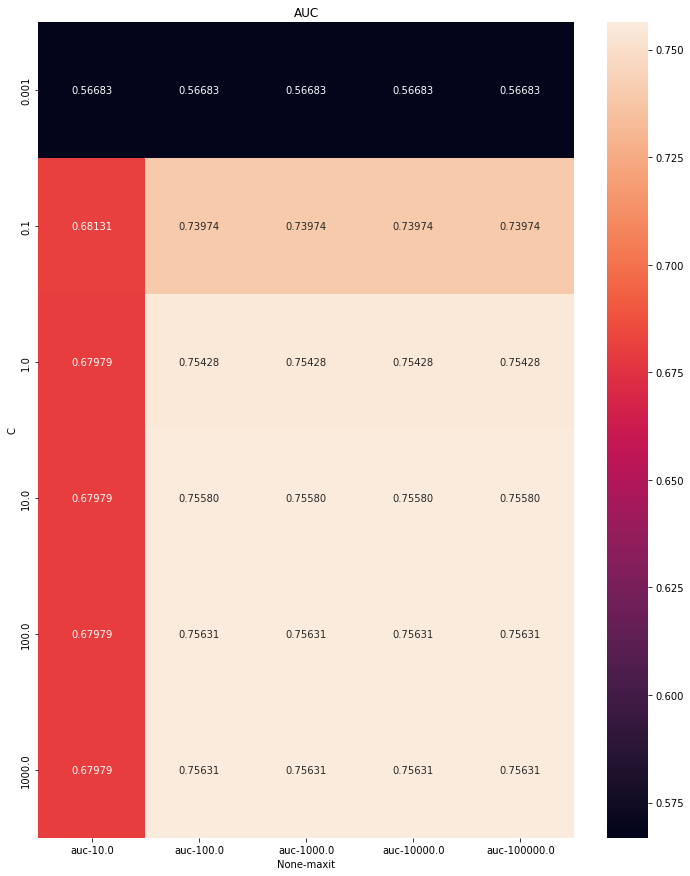

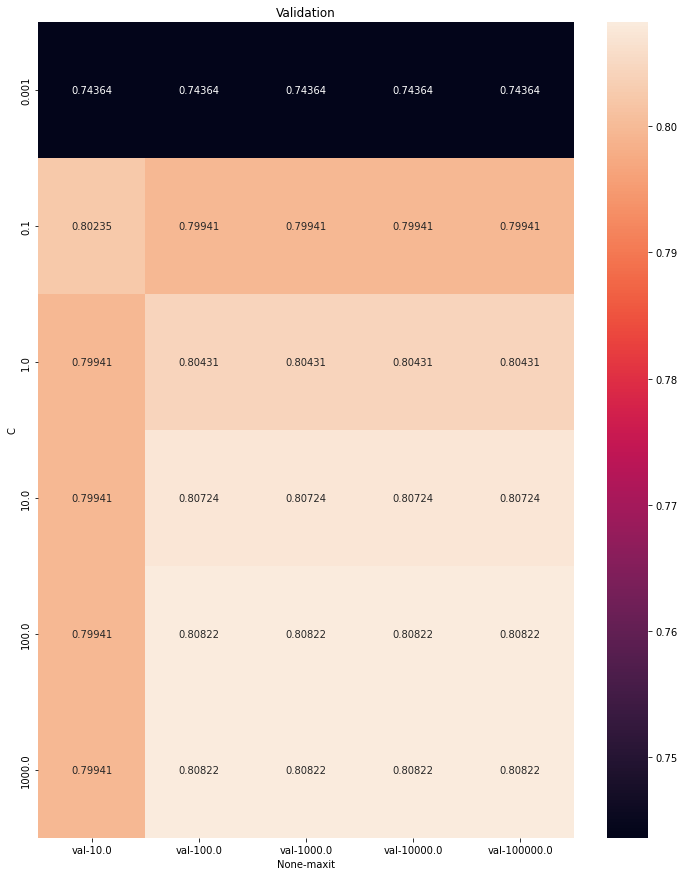

In [767]:
df_linclf_th007 = df_linclf[df_linclf["th"]==0.07]
df_linclf_th007_pivot = df_linclf_th007.pivot(index='C', columns=['maxit'], values=['auc'])
f, ax = plt.subplots(figsize=(12, 15))
plt.title("AUC")
sns.heatmap(df_linclf_th007_pivot, annot=True, fmt=".5f")
df_linclf_th007_pivot = df_linclf_th007.pivot(index='C', columns=['maxit'], values=['val'])
plt.show()
f, ax = plt.subplots(figsize=(12, 15))
plt.title("Validation")
sns.heatmap(df_linclf_th007_pivot, annot=True, fmt=".5f")
plt.show()
#f, ax = plt.subplots(figsize=(12, 15))
#plt.title("F1")

In [763]:
threshold_value = 0.07
linfit = LogisticRegression(solver='liblinear', C=10, max_iter=100)
v=test_classifier(linfit,linear_class_predict,X_train,y_train,X_val,y_val)
v

(0.8183300717547293, 0.8072407045009785, 0.755804480651731, 0.2213438735177866)

**starting from max_iteration = 100 and C = 10, threshold = 0.07, validation is around 80%, AUC is around 0.75, F1=0.22**

## Model Selection

In [764]:
model_selection_param = pd.DataFrame(columns = ["Method","Validation","AUC","F1"])
model_selection_param=model_selection_param.append(dict(zip(["Method","Validation","AUC","F1"] , ["Decision Tree / max_depth=6 ",0.95,0.59,0.26])),ignore_index=True)
model_selection_param=model_selection_param.append(dict(zip(["Method","Validation","AUC","F1"] , ["Random Forest / max_depth=15, n_estimator = 7 ",0.96,0.56,0.20])),ignore_index=True)
model_selection_param=model_selection_param.append(dict(zip(["Method","Validation","AUC","F1"] , ["Linear / max_iteration = 100, C=10, threshold = 0.07, n_estimator = 7 ",0.8,0.75,0.22])),ignore_index=True)
model_selection_param
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
#theta = np.arange(3+1) / 3.0 * 2 * np.pi
#for k in range(3):
#    ax.plot(theta,np.hstack((model_selection_param.iloc[k,1:],model_selection_param.iloc[k,1])), color="C"+str(k+1), marker="o", label=model_selection_param.iloc[k,0])
#    ax.fill(theta, np.hstack((model_selection_param.iloc[k,1:],model_selection_param.iloc[k,1])), 'green', alpha=0.1)


,Method,Validation,AUC,F1
0,Decision Tree / max_depth=6,0.95,0.59,0.26
1,"Random Forest / max_depth=15, n_estimator = 7",0.96,0.56,0.20
2,"Linear / max_iteration = 100, C=10, threshold ...",0.80,0.75,0.22


* **Decision Tree / max_depth=6	is chosen, as a compromise between classification speed, and overall performance**

# Export pickle

In [869]:
import pickle

dt = DecisionTreeClassifier(max_depth=6)
v=test_classifier(dt,dt.predict,X_train,y_train,X_val,y_val)
with open("model.bin", 'wb') as f:  pickle.dump(dt,f)
with open("dv.bin", 'wb') as f: pickle.dump(dv,f)

## Testing Flask app

In [898]:
# client.py: get data of the new user
import requests
import json

test_1 = {'gender': 'Female',
 'age': 34.0,
 'hypertension': 'No',
 'heart_disease': 'No',
 'ever_married': 'No',
 'work_type': 'Govt_job',
 'residence_type': 'Urban',
 'avg_glucose_level': 231.5,
 'bmi': 57.4,
 'smoking_status': 'never smoked'}


test_2 = {'gender': 'Male',
 'age': 39.0,
 'hypertension': 'Yes',
 'heart_disease': 'No',
 'ever_married': 'No',
 'work_type': 'Govt_job',
 'residence_type': 'Rural',
 'avg_glucose_level': 118.5,
 'bmi': 63,
 'smoking_status': 'never smoked'}



url = "http://127.0.0.1:9696/predict"
results = requests.post(url, json=test_1).json()
print("Stroke prediction for person 1 : %d" % results["stroke_predict"])
results = requests.post(url, json=test_2).json()
print("Stroke prediction for person 2 : %d" % results["stroke_predict"])

Stroke prediction for person 1 : 1
Stroke prediction for person 2 : 0


# Test on Public cloud (thanks to PythonAnywhere)

In [899]:
url="https://kallelay.eu.pythonanywhere.com/predict"
results = requests.post(url, json=test_1).json()
print("Stroke prediction for person 1 : %d" % results["stroke_predict"])
results = requests.post(url, json=test_2).json()
print("Stroke prediction for person 2 : %d" % results["stroke_predict"])

Stroke prediction for person 1 : 1
Stroke prediction for person 2 : 0
